# Demonstrate Filtering and Trimming of Messages

In [11]:
from json import load
from langchain_core.messages import AIMessage, HumanMessage
from langchain_google_genai.chat_models import ChatGoogleGenerativeAI
from langgraph.graph.message import MessagesState
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from pprint import pprint
from dotenv import load_dotenv
load_dotenv()

True

In [8]:
# define some messages
messages = [
    AIMessage(content="Do you need information on Neutron stars?", name="Bot"),
    HumanMessage(content="Yes, I am looking for a 150 word description of Neutron stars?", name="Arun")
]

for message in messages:
    message.pretty_print()

================================== Ai Message ==================================
Name: Bot

Do you need information on Neutron stars?
================================ Human Message =================================
Name: Arun

Yes, I am looking for a 150 word description of Neutron stars?


In [9]:
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
llm.invoke(messages)

AIMessage(content="Neutron stars are incredibly dense remnants of massive stars that have undergone supernova explosions.  Packed into a sphere only about 20 kilometers across is a mass greater than our Sun's. This extreme density crushes atoms, leaving behind a core primarily composed of neutrons, hence the name.  Their intense gravity creates immense surface gravity, many billions of times stronger than Earth's.  Neutron stars often spin incredibly rapidly, sometimes hundreds of times per second, and possess incredibly strong magnetic fields, trillions of times stronger than Earth's.  These extreme magnetic fields can generate powerful beams of radiation, observable as pulsars if the beam sweeps across Earth.  Neutron stars represent a fascinating and extreme state of matter, providing valuable insights into the fundamental forces of the universe.", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_

## Create a chat model graph

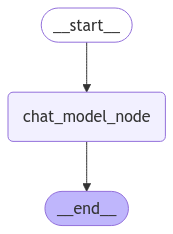

In [12]:
def chat_model_node(state:MessagesState):
    return {"messages":llm.invoke(state["messages"])}


builder = StateGraph(MessagesState)
builder.add_node("chat_model_node", chat_model_node)

builder.add_edge(START, "chat_model_node")
builder.add_edge("chat_model_node",END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))


In [ ]:
response = graph.invoke({"messages":messages})

for m in response["messages"]:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

Do you need information on Neutron stars?
================================ Human Message =================================
Name: Arun

Yes, I am looking for a 150 word description of Neutron stars?
================================== Ai Message ==================================

Neutron stars are incredibly dense remnants of massive stars that have undergone supernova explosions.  A teaspoon of neutron star material would weigh billions of tons on Earth.  Their intense gravity compresses matter into a state where protons and electrons are forced together to form neutrons, hence their name.  These stars are typically only 10-20 kilometers in diameter, yet possess a mass 1.4 to 2 times that of our Sun.  Their rapid rotation and strong magnetic fields create powerful beams of radiation, detectable as pulsars.  These beams sweep across space like a lighthouse, producing regular pulses of electromagn

: 

#### Strategies
1. Updating *MessagesState* to keep only last N number of messages in the state. The state only keeps last N messages and others are discarded.
2. Invoking chat model with last N number of messages. No messages are discarded.
3. Trimming the messages to send only N number of tokens using the _trim_messages()_ available in `langchain_core.messages`